In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [3]:
X, y = load('../../data.joblib')
y.unique()

array([0, 1], dtype=int64)

In [4]:
X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.000000,0.00000,0.0,0.0,0.0,1.000,1.0,0.000,0.0,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.891594,0.00000,0.0,0.0,0.0,1.000,1.0,0.800,0.6,0.007500,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,0.548717,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
3,0.434425,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999829,0.03125,0.0,0.0,0.0,1.000,1.0,0.384,0.0,0.229375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X.isna().any().any()

False

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [7]:
def model_info(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred))
    print('Recall score: ', recall_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [9]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train data:\n')
    y_train_pred = model.predict(X_train)
    model_info(y_train, y_train_pred)
    
    print('\n--------------------------------------\n')

    print('Test data:\n')
    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)

    return model

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtc = DecisionTreeClassifier(random_state=55)

In [12]:
dtc = build_model(dtc, X_train, X_test, y_train, y_test)

Train data:

Confusion matrix: 
 [[47918   114]
 [  181 49697]]
Accuracy score:  0.9969870289040956
Precision score:  0.9977113488988376
Recall score:  0.9963711455952524
F1 score:  0.9970407968782915

--------------------------------------

Test data:

Confusion matrix: 
 [[ 9812  2152]
 [ 2118 10396]]
Accuracy score:  0.8255576435983332
Precision score:  0.8284985655084476
Recall score:  0.8307495604922487
F1 score:  0.829622536110446


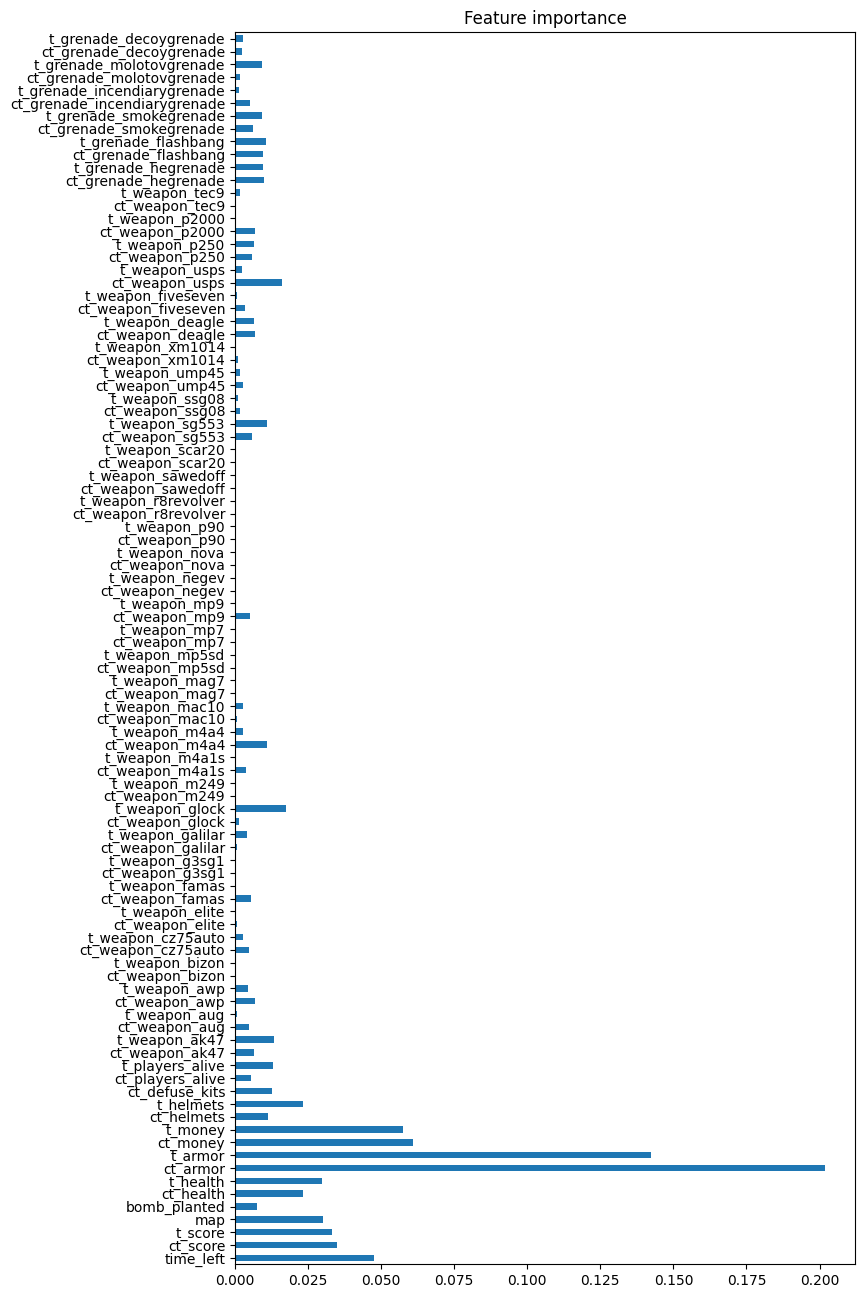

In [13]:
plt.figure(figsize=(8, 16))
pd.Series(dtc.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, 25, 30, 35, 40, 45]
}

In [15]:
estimator = GridSearchCV(DecisionTreeClassifier(random_state=55), param_grid=params, cv=3)

In [16]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=55),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30, 35, 40, 45]})

In [17]:
estimator.best_params_

{'criterion': 'entropy', 'max_depth': 45}

In [18]:
estimator.best_score_

0.7949749895991561

In [19]:
estimator = build_model(estimator, X_train, X_test, y_train, y_test)

Train data:

Confusion matrix: 
 [[47687   345]
 [  221 49657]]
Accuracy score:  0.9942191808804004
Precision score:  0.9931002759889604
Recall score:  0.9955691888207225
F1 score:  0.9943331998398078

--------------------------------------

Test data:

Confusion matrix: 
 [[ 9776  2188]
 [ 2077 10437]]
Accuracy score:  0.8257619086526677
Precision score:  0.8266930693069307
Recall score:  0.8340258910020777
F1 score:  0.8303432913003699


In [20]:
from sklearn.decomposition import PCA

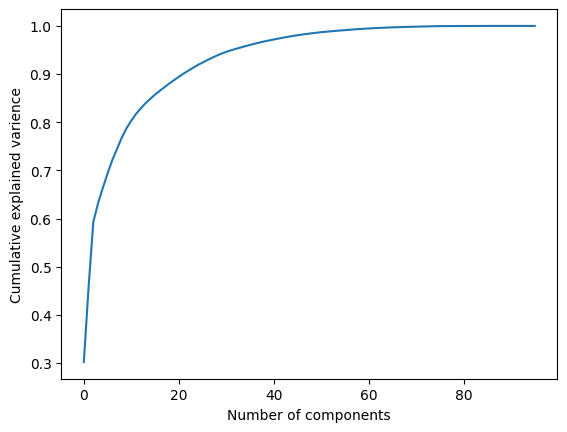

In [21]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained varience')
plt.show()

In [22]:
pca = PCA(n_components=60)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
dtc_pca = DecisionTreeClassifier(criterion=estimator.best_params_['criterion'], max_depth=estimator.best_params_['max_depth'],random_state=55)

In [24]:
dtc_pca = build_model(dtc_pca, X_train_pca, X_test_pca, y_train, y_test)

Train data:

Confusion matrix: 
 [[47914   118]
 [  184 49694]]
Accuracy score:  0.9969155346747013
Precision score:  0.9976310929093392
Recall score:  0.9963109988371627
F1 score:  0.9969706088875514

--------------------------------------

Test data:

Confusion matrix: 
 [[8973 2991]
 [2979 9535]]
Accuracy score:  0.7561075251246017
Precision score:  0.7612166693277982
Recall score:  0.7619466197858399
F1 score:  0.7615814696485623


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
random_forest = RandomForestClassifier(n_estimators=200, random_state=55)

In [27]:
random_forest = build_model(random_forest, X_train, X_test, y_train, y_test)

Train data:

Confusion matrix: 
 [[47875   157]
 [  138 49740]]
Accuracy score:  0.9969870289040956
Precision score:  0.99685351824759
Recall score:  0.997233249127872
F1 score:  0.9970433475319469

--------------------------------------

Test data:

Confusion matrix: 
 [[10632  1332]
 [ 1587 10927]]
Accuracy score:  0.8807500612795163
Precision score:  0.8913451341871278
Recall score:  0.8731820361195461
F1 score:  0.8821701045493078


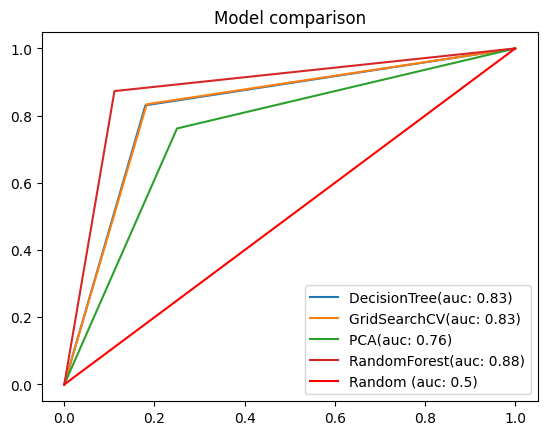

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [dtc, estimator.best_estimator_, dtc_pca, random_forest]
model_names = ['DecisionTree', 'GridSearchCV', 'PCA', 'RandomForest']
for model, model_name in zip(models, model_names):
    if model_name == 'PCA':
        y_pred = model.predict(X_test_pca)
    else:
        y_pred = model.predict(X_test)

    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()

In [29]:
from joblib import dump

In [30]:
dump(models, 'trees.joblib')

['trees.joblib']